## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import tensorflow.keras as keras



In [2]:
#  Import and read the charity_data.csv.
# 3 hours waiting for tensor flow to install on jupyter, went with colaboratory
url = 'https://raw.githubusercontent.com/Jermov/deep-learning-challenge/main/Resources/charity_data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
##check for nulls--none found
df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [5]:
#check for dupe columns--none found
df.duplicated().sum()

0

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df.drop(columns = ['EIN','NAME'], inplace=True)

In [7]:
#check drop
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Determine the number of unique values in each column.
for i in df.columns:
    print(i, len(df[i].unique()))


APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [9]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# wanted 700, but it puts the count of 'other' at 804 which intermixes
# with the list. determined under 500 lists 'other' at bottom of list
# which is completely aesthetic, but why not
type_to_replace = list(app_counts[app_counts<500].index)

# Replace in dataframe
for app in type_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummy = pd.get_dummies(df)
app_dummy.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
X = app_dummy.drop('IS_SUCCESSFUL', axis=1).values
y = app_dummy['IS_SUCCESSFUL'].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# but what's it look like?
X_train_scaled.shape

(25724, 43)

## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2/3 is 28.38 +1 for the output layer so chose 30 for the first hidden node
hidden_node1 = 30
hidden_node2 = 10
# Add a third hidden layer
hidden_node3 = 10
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))

# Output layer (sigmoid due to binary classification)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Create a callback that saves the model's weights every five epochs
# Import checkpoint dependencies
import os
from keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback 
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)




In [20]:
# Train the model
# third level saw 72%- gross-looking at 2
fit_model = nn.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 6s 5ms/step - loss: 0.5928 - accuracy: 0.7007
Epoch 2/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5570 - accuracy: 0.7273
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7291
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7300
Epoch 5/50
794/804 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7308
Epoch 5: saving model to checkpoints/weights.5.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5498 - accuracy: 0.7305
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7304
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7320
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7313
Epoch 9/50
804/804 [==============================] - 2s 2ms/st

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5572 - accuracy: 0.7283 - 523ms/epoch - 2ms/step
Loss: 0.5571759343147278, Accuracy: 0.7282798886299133


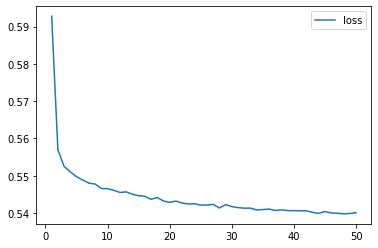

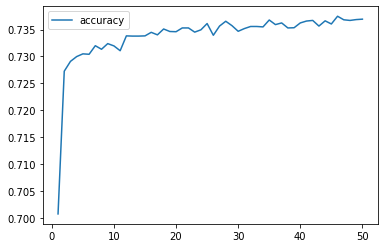

In [22]:
# Export our model to HDF5 file
# Create a DataFrame containing training history of the 1st model
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

nn.save('../h5_files/AlphabetSoupCharity_model_1.h5')

In [23]:
# about 50% loss and 73.8% accuracy for model 1